<a href="https://colab.research.google.com/github/sofiacanelag/MLUCM2223/blob/main/TRABAJO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import math
%matplotlib inline     
sns.set(color_codes=True)

##1. ANÁLISIS DESCRIPTIVO DE LOS DATOS
DESCRIPCIÓN DE LAS VARIABLES
1. **id**: Identificador único para cada casa vendida
2. **date**: Fecha en la que se vendió la casa.
3. **price**: Precio de venta de la casa.
4. **bedrooms**: Número de habitaciones en la casa.
5. **bathrooms**: Número de baños en la casa. Donde 0.5 representa una habitación con un inodoro pero sin ducha
6. **sqft_living**: Área de la sala de estar de la casa en pies cuadrados.
7. **sqft_lot**: Área del terreno en pies cuadrados.
8. **floors**: Número de pisos en la casa.
9. **waterfront**: Variable binaria que indica si la casa tiene vista al agua.
10. **view**: Índice de la vista de la casa (0-4).
11. **condition**: Índice de la condición de la casa (1-5).
12. **grade**: Índice de la calidad de la construcción y diseño de la casa (1-13). Donde del 1 al 3 no cumplen con la construcción y diseño de la edificación, 7 tiene un nivel promedio de construcción y diseño, y del 11 al 13 tienen un nivel alto de calidad en la construcción y diseño.
13. **sqft_above**: Área de la casa por encima del nivel del suelo en pies cuadrados.
14. **sqft_basement**: Área del sótano de la casa en pies cuadrados.
15. **yr_built**: Año en que se construyó la casa.
16. **yr_renovated**: Año en que se renovó la casa (0 si nunca se renovó).
17. **zipcode**: Código postal de la ubicación de la casa.
18. **lat**: Latitud de la ubicación de la casa.
19. **long**: Longitud de la ubicación de la casa.
20. **sqft_living15**: Área de la sala de estar de los 15 vecinos más cercanos en pies cuadrados.
21. **sqft_lot15**: Área del terreno de los 15 vecinos más cercanos en pies cuadrados.

Estos datos describen varias características de las casas vendidas en King County, Washington, EE. UU. durante el período de mayo de 2014 a mayo de 2015

In [ ]:
#Veamos una tabla de los datos con los que trabajaremos:
df = pd.read_csv('kc_house_data(1).csv')
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


1.1. CANTIDAD DE VALORES NULOS Y TIPOS DE VARIABLES

In [ ]:
#obtenemos info sobre los tipos de datos, nro de columnas faltantes
# vemos que no faltan columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Observamos que no hay missing data.
Apreciamos la variable id, que es la variable identificadora de cada casa.
Además podemos ver de que tipo es cada variable. Vemos que la única variable categórica que nos aparece es date, pero aún así variables como *waterfront*, *view*, *condition* y *grade*, que aparecen commo enteras, también son categóricas.
Así mismo, vemos que *bathrooms* y *floors* son variables float porque, por ejemplo un aseo, de lavabo y váter, contabiliza 0,5, y o también áticos y sótanos que no contabilizan como plantas enteras.


In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"duplicados: {duplicate_rows.shape}")

1.2. VARIABLES, PROPIEDADES Y DISTRIBUCIÓN.

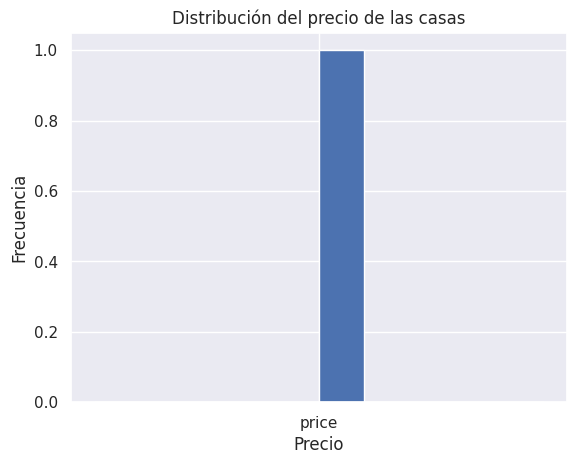

In [ ]:
# Distribución de la variable objetivo
df['price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('price')
plt.show()

Observamos que la mayor parte de las casas están entre precios bajo y medios. Según aumenta el precio, la frecuencia disminuye de manera pronunciada.

In [ ]:
# Hagamos copia del data frame sobre el que haremos los cambios
df_cop = df.copy()
df_cop.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')